### NECESSARY IMPORTS

In [28]:
from matplotlib.patches import Rectangle

import random
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
from sklearn.manifold import TSNE,MDS,Isomap
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import pandas as pd



def _set_seeds(seed):


    """ sets all the required seed values for a run"""
        

    random.seed(seed)
    np.random.seed(seed) 
    os.environ['PYTHONHASHSEED'] = str(seed)
    try:
        import tensorflow as tf
        tf.random.set_seed(seed)
    except Exception as e:
        pass    
    try:
        import torch
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.use_deterministic_algorithms(True)
        torch.manual_seed(seed)
    except Exception as e:
        pass
    
# select the random seed for generating the dataset
random_seed=40
#-------------------------------------------------

_set_seeds(random_seed) 

### DEFINING THE FUNCTION FOR GENERATING THE  DATASET

In [29]:
from random import uniform,randint,choice

name='GAD'


def gen_coords(person,nationality,gender,x1, y1, n,anomalous,pairs,traj_pair_details):
    total_timestamps=n
    x,y,details=[x1],[y1],[]
    x_point,y_point=x1,y1
    x.append(x1)
    y.append(y1)
    timestep=0
    ts,te=random.choice(pairs)
    #print(person)
    #print('randomly selected:',ts,te,anomalous)
    traj_pair_details[person]=[ts,te]
    while(timestep<=total_timestamps):
        
        if ts<=timestep<=te and anomalous==1:
            
            x_rand=0
            y_rand=2
            
            
        else:
            x_rand=randint(1,3)
            y_rand=randint(-6,8)
            while y_rand==0:
                    #print(y_rand)
                    y_rand=randint(-6,8)
                    
        
        
        prev_x=x_rand
        prev_y=y_rand
        
        x.append(x_point+x_rand)
        y.append(y_point+y_rand)
        #print('-----',timestep,target_point)
        details.append([timestep,person,nationality,gender,x_point+x_rand,y_point+y_rand,anomalous])
        x_point=x_point+x_rand
        y_point=y_point+y_rand
        
        timestep+=1
    
    
    if anomalous:
        
        plt.plot(x,y, 'r-',marker='o')
        
    else:
        plt.plot(x,y, 'xb-',marker='o')
    
    return x,y,details,traj_pair_details





### SELECT THE DATASET NUMBER FOR CREATION

In [30]:


### Choose the total time (sequence) steps 
steps=100


# dataset_dict= {dataset_number:[total_trajectories,random_pairs_of_contionus_anomalies,anom_trajectories]}
dataset_dict={1:[100,[[40,60],[60,90],[20,50],[45,55],[65,95],[30,40],[70,80],[15,35],[5,32],[37,55]],
                 [2,5,7,10,15,20,25,40,54,56,76,54,43,32,23,34,45,67,78,89,89,33],steps],
             2:[50,[[10,30],[15,25],[36,56],[17,30]],
                 [1,4,7,9,33,45,22,29,31,12,17],steps],
            3:[75,[[1,20],[25,45],[40,56],[67,88]],
                 [3,6,7,8,10,33,42,66,72,44,34,14],steps],
            4:[55,[[0,0]],
                 [],steps],
            5:[85,[[0,0]],
                 [],steps],
            6:[5,[[0,0]],      #normal sample data
                 [],steps],
            7:[6,[[8,30],[30,50],[50,80],[20,40]],             #anomalous sample data
                 [1,3,5],steps],
            8:[400,[[1,20],[30,40],[60,90],[50,70],[12,44],[78,98],[33,66],[12,44],[10,15],[5,10],[25,22],[15,30]
                   ,[55,75],[88,97],[22,44]],             
                 [234, 296, 268, 16, 125, 144, 340, 326, 105, 65, 390, 178, 141,
                  380, 225, 14, 270, 377, 66, 30, 328, 103, 317, 362, 235, 27, 90, 309, 
                  160, 58, 128, 166, 74, 400, 262, 348,267, 49, 208, 25, 161, 374, 387, 
                  171, 116, 78, 158, 83, 266, 356],steps]
             }

###choose 'dataset number'  as the key of the dictionary 'dataset_dict' and 
dataset_number=7



### PLOTTING THE SELECTED DATASET

<ipython-input-29-fc0357a89e95>:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "xb-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(x,y, 'xb-',marker='o')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


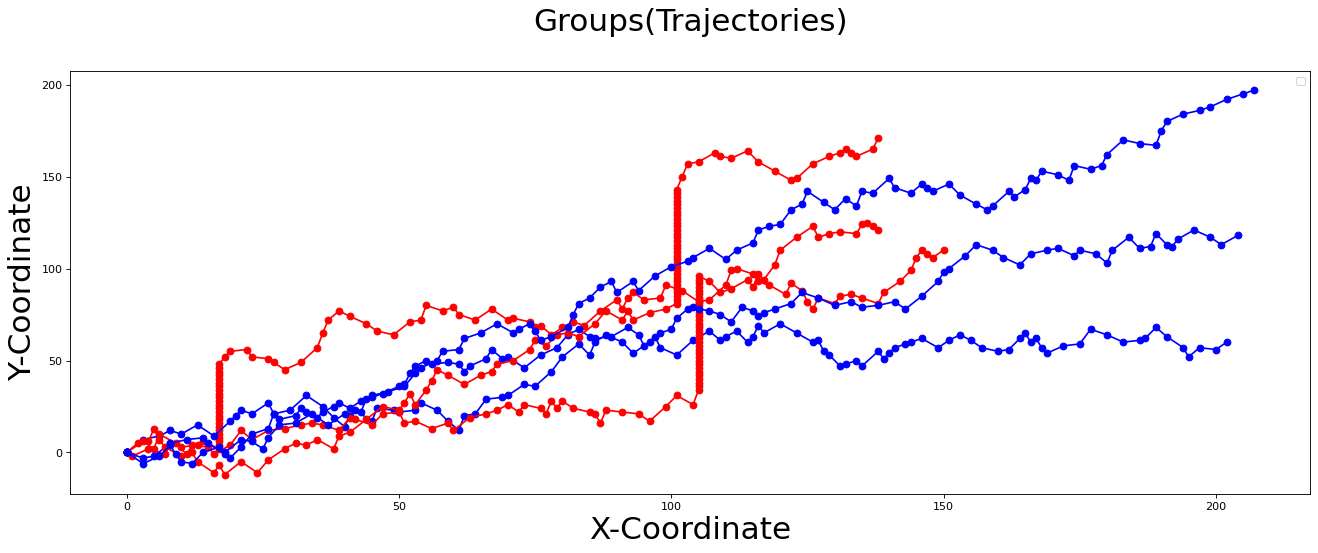

<Figure size 1440x2880 with 0 Axes>

In [31]:




trajectories=dataset_dict[dataset_number][0]


plt.figure(figsize=(20, 7), dpi=80)
init_x=0
init_y=0




max_x=0
max_y=0
data=[]

pairs=dataset_dict[dataset_number][1]
anom_trajectories=dataset_dict[dataset_number][2]

if len(anom_trajectories)==0:
    dataset_type='norm'
else:
    dataset_type='anom'

traj_pair_details={}
for p in range(1,trajectories+1):
    #anomalous=False
    if p in anom_trajectories: 
        anomalous=1
        
    else:
        anomalous=0
    gender=choice(['male','female'])
    nationality=choice(['Indian','German','American','African','Chinese'])
    
    x,y,details,traj_pair_details=gen_coords(p,nationality,gender,init_x,init_y,steps-1,anomalous,pairs,traj_pair_details)
    init_x+=0
    init_y+=0
    data.append(details)
    if max(x)>max_x:
        #print(x)
        max_x=max(x)
    if max(y)>max_y:
        #print(y)
        #print(max(y))
        max_y=max(y)
    #print(x,y,np.array(details))
    
#print(max_x,max_y)
#print(traj_pair_details)
#plt.xticks(np.arange(0, max_x+1, 1))
#plt.yticks(np.arange(0, max_y+1, 1))
plt.xlabel('X-Coordinate',fontsize=28)
plt.ylabel('Y-Coordinate',fontsize=28)
plt.legend()
plt.title('Groups(Trajectories)\n',fontsize=28)
plt.figure(figsize=(20,40))
plt.show()
#print([i for i in data])
new_data=sorted([list(j)  for i in np.reshape(a=np.array(data) ,newshape=(1,trajectories*(steps),len(details[0]))) for j in i],key=lambda x: int(x[0]))
#print(new_data)

#new_data=np.reshape(a=np.array(data) ,newshape=(1,persons*steps,6)).squeeze(0)
#print(np.sort(new_data))
#print([i for i in new_data[new_data[:, 0].argsort()]])
#new_data=new_data[new_data[:, 0 ].argsort()]






## SAVE DATASET AS .CSV


In [32]:
import csv 

heads = ['Timestep','Person', 'Nationality', 'Gender','X_Coord','Y_Coord','Target'] #filename = "Trajectorys_30_50_10p_100t_latest.csv"
#filename = "Trajectorys_30_50_10p_100t_latest.csv"

#print(dataset_dict[dataset_number])
if dataset_dict[dataset_number][0] in [5,6]:  # normal /anomalous dataset sample
    filename=f'Trajectorys2__{dataset_type}_sample.csv'
else:
    filename = f"Trajectorys2_{steps}_{trajectories}_{dataset_type}.csv"
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(heads) 
    csvwriter.writerows(new_data)

## LOAD DATASET TO PLOT

<ipython-input-33-284f39574a3b>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_data=nn.Linear(torch.tensor(coords_scaled).shape[1],1)(torch.tensor(coords_scaled))


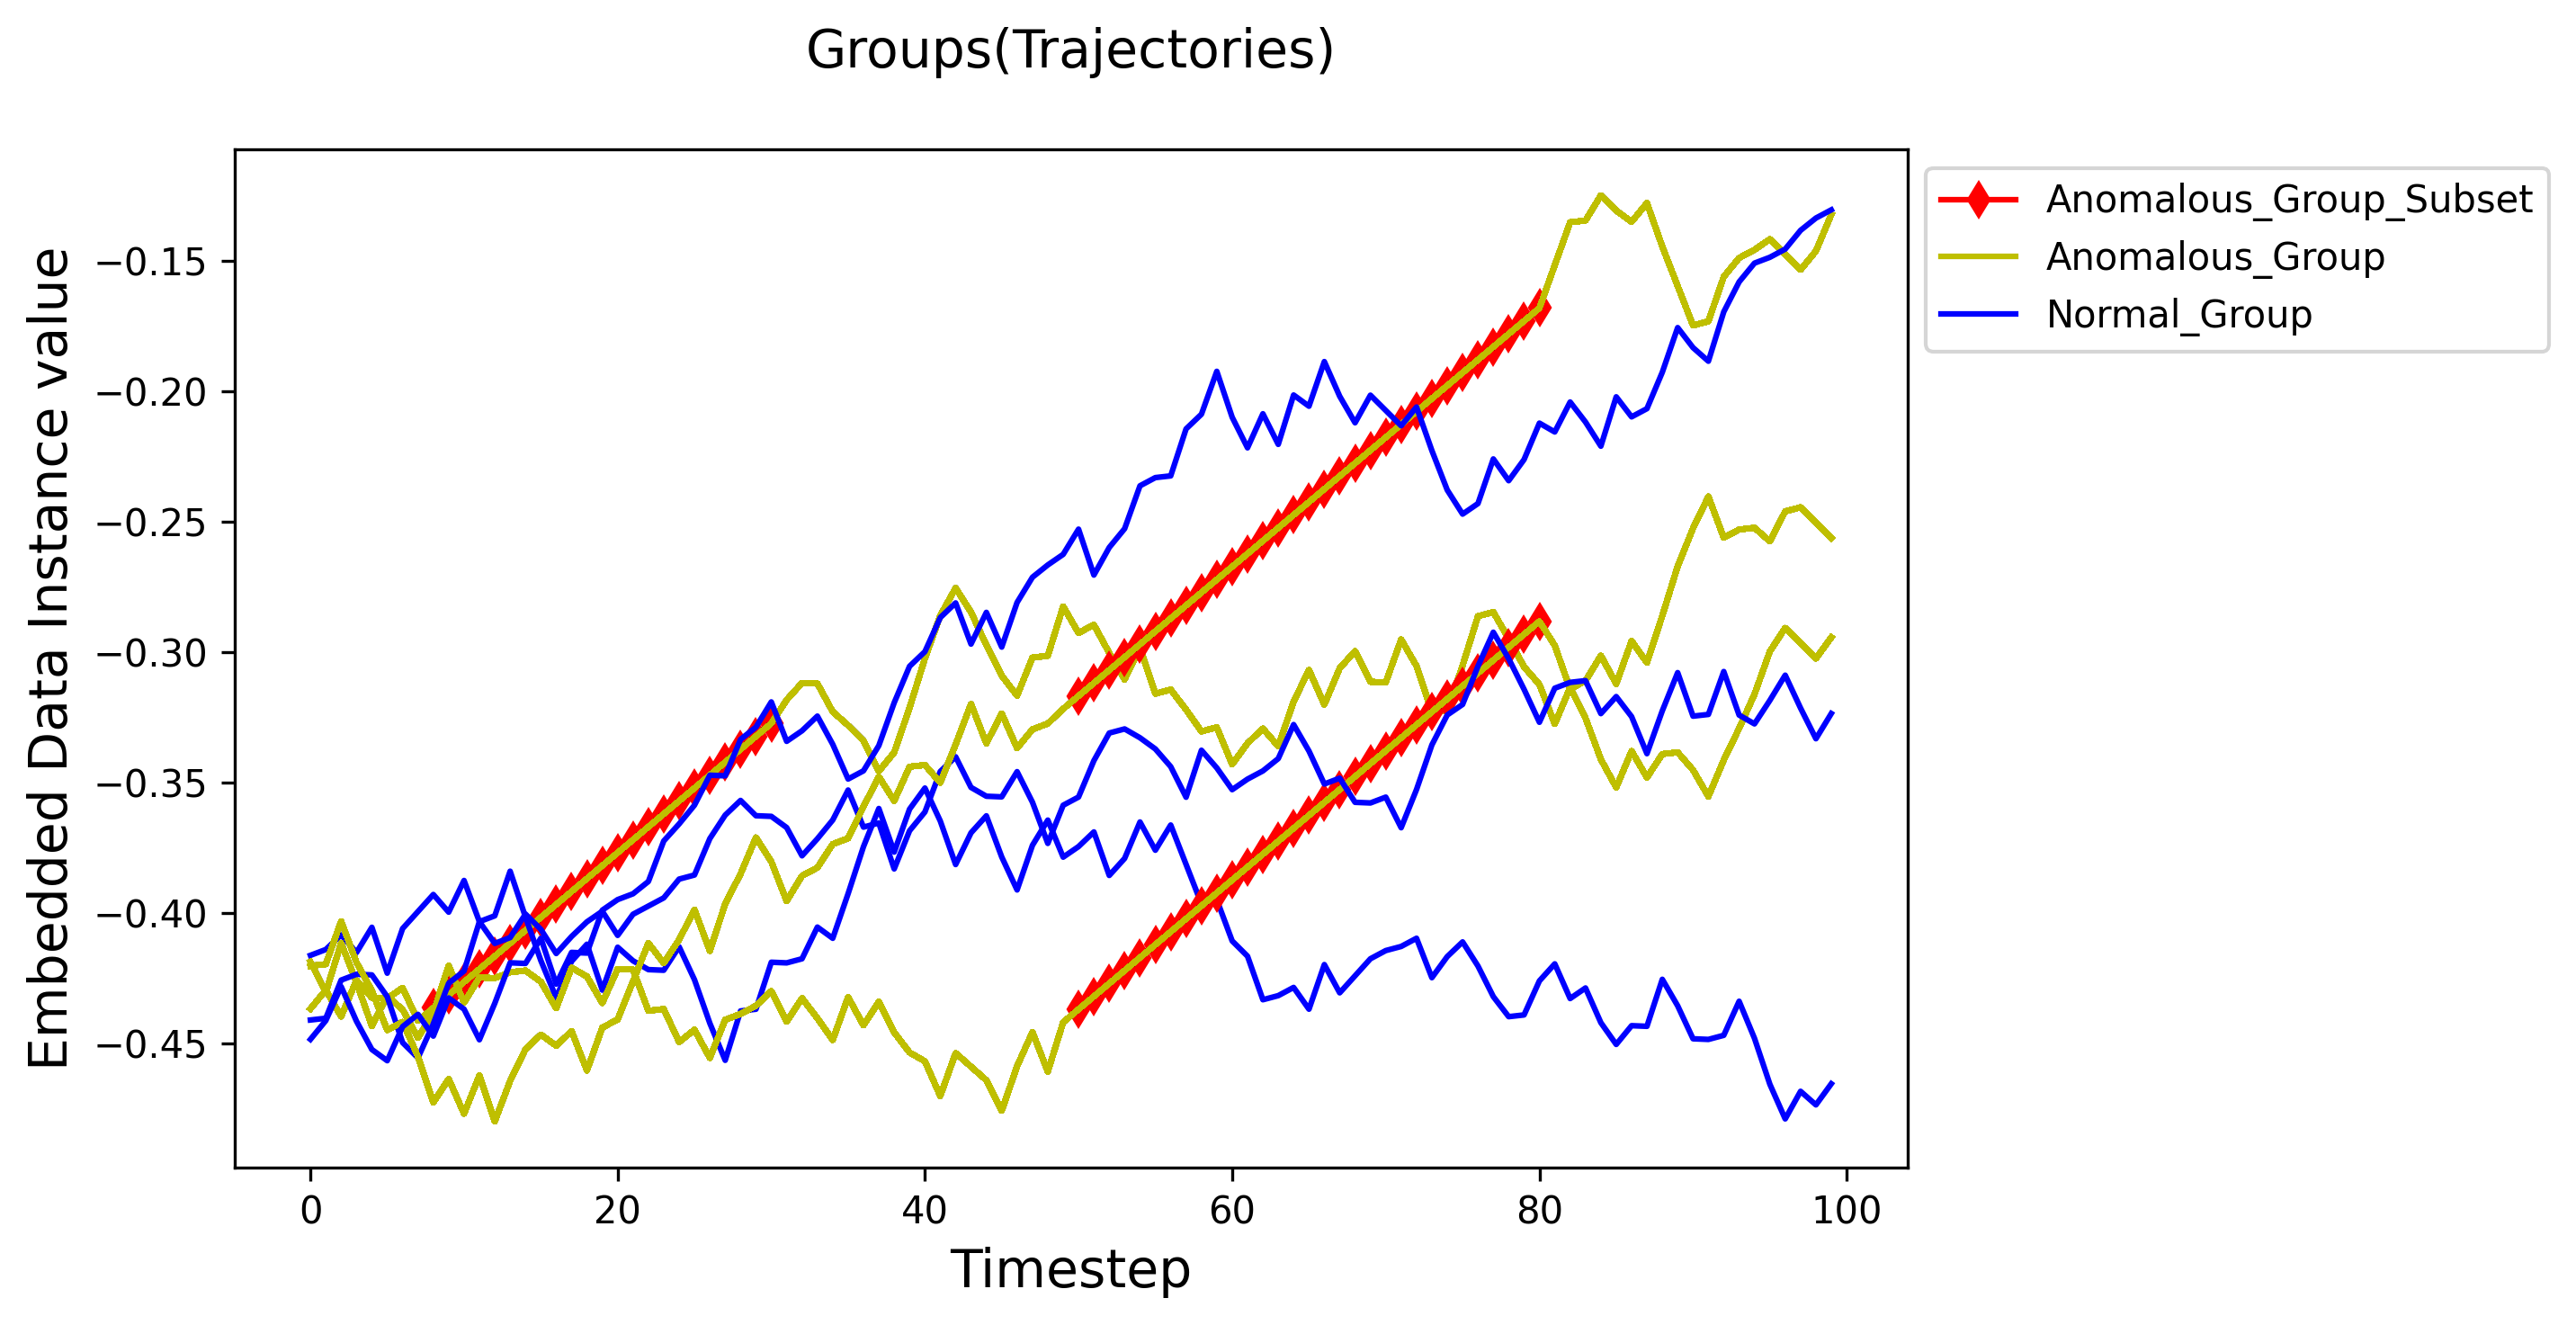

In [33]:


###loading the dataset

df = pd.read_csv(filename)
###-------------------


### Embedding the Coordinates to a single value for plotting 

persons=trajectories
trajecs=list(range(1,persons+1))    
coords=None
for traj in trajecs:      

              
            df_temp=df.loc[df['Person'] == traj]
            df_temp=df_temp[['X_Coord','Y_Coord']].to_numpy()
            try:
                coords=np.vstack((coords,df_temp))
            except:
                coords=df_temp


                        
                           
mm_scaler=MinMaxScaler()
mm_scaler.fit(coords)

coords_scaled=mm_scaler.transform(coords)

coords_scaled=torch.from_numpy(coords_scaled).float()                           
n=len(coords_scaled)-1

new_data=nn.Linear(torch.tensor(coords_scaled).shape[1],1)(torch.tensor(coords_scaled))

new_data=new_data.detach().flatten().numpy()


l=len(df.Person.unique())
m=len(df.columns)-1
n=len(df.iloc[:,-2:].to_numpy())-1
trajecs=list(range(1,persons+1))    
for traj in trajecs:      # set(i for i in df.traj)

            df_temp=df.loc[df['Person'] == traj]
            df_temp=df_temp[['Target']].to_numpy()
            #print(df_temp)
            try:
                labels=np.vstack((labels,df_temp))
            except:
                labels=df_temp
                
new_data=np.reshape(new_data,(l,(n+1)//l))
labels=np.reshape(labels,(l,(n+1)//l))

###-------------------


### PLotting the dataset

plt.figure(figsize=(8, 5), dpi=300)
plt.xlabel('Timestep',fontsize=14)
plt.ylabel('Embedded Data Instance value',fontsize=14)
min_point=10000
max_point=-10000
anom_trajecs=anom_trajectories

for traj,points in zip(df.Person.unique(),new_data):   
    
    
    if traj in anom_trajecs:
            
            
            points_list=[]
            points_modified=[]
            for i,j in list(enumerate(points)):
                
                anom_start,anom_end=traj_pair_details[traj]
                
                anom_list=list(range(anom_start,anom_end+1))
                
                if i in anom_list:
                    flag=True
                    plt.plot(i,j,'r',marker='d',label='Anomalous_Group_Subset')
                    #print(i,j)
                    points_list.append(j)
            
            
            
            points_modified=[i for i in points if i not in points_list]
            
            if flag:
                
                for i,j in list(enumerate(points)):
                
                    plt.plot(range(len(points)),points,'y',label='Anomalous_Group')
                    flag=False
            #plt.show()
                
                    

            
            
    else:
        plt.plot(range(len(points)),points,color='b',label='Normal_Group')
        #plt.show()




handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1, 1))
plt.title(f'Groups(Trajectories)\n',fontsize=14)
plt.show()

###-------------------